### Objectives
In this lab, you will learn how to create prompts to generate Python code that can:

1. Generate a statistical description of all the features of the data set
2. Generate regression and box plots for different attributes to compare their distribution against a target attribute
3. Evaluate the correlation value, Pearson coefficient, and p-values for different parameters of the data set with the target parameter
4. Create pivot tables for a group of parameters and visualize them using pcolor plots

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 

In [8]:
%pip install seaborn

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

In [4]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Specify the file path of the CSV file
file_path = "dataset.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)

# Display the first few rows of the data frame
print(df.head())

   Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0             0           0         Acer         4    2   1         5   
1             1           1         Dell         3    1   1         3   
2             2           2         Dell         3    1   1         7   
3             3           3         Dell         4    2   1         5   
4             4           4           HP         4    2   1         7   

   Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0              14.0       0.551724       8             256        3.52800   
1              15.6       0.689655       4             256        4.85100   
2              15.6       0.931034       8             256        4.85100   
3              13.3       0.551724       8             128        2.69010   
4              15.6       0.620690       8             256        4.21155   

   Price Price-binned  Screen-Full_HD  Screen-IPS_panel  
0    978          Low               0   

In [5]:
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


### Write a Python code to perform the following actions.
1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

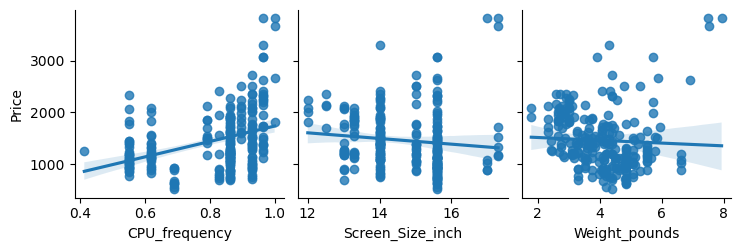

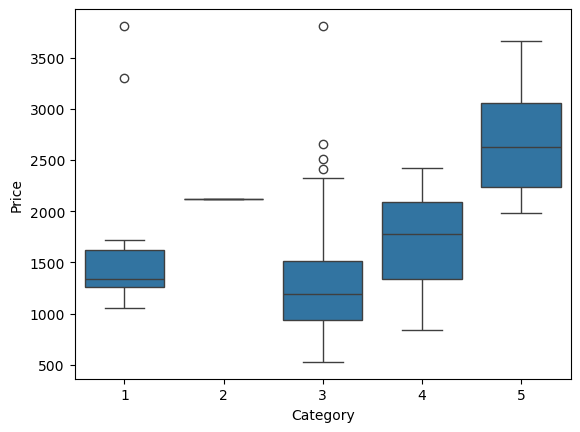

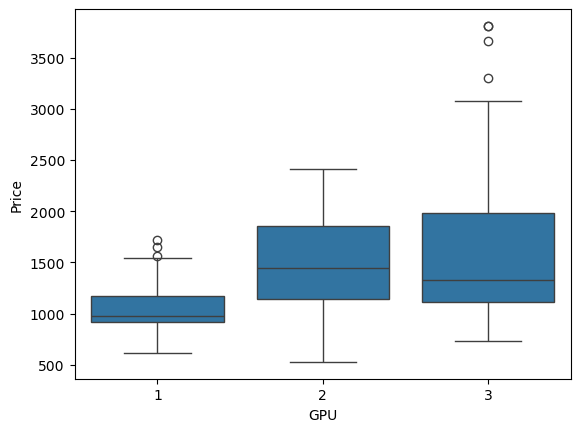

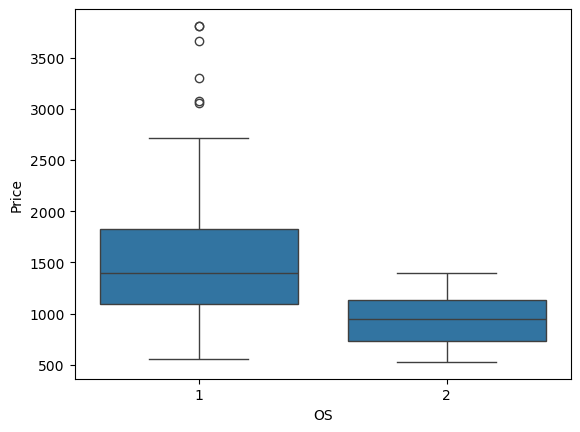

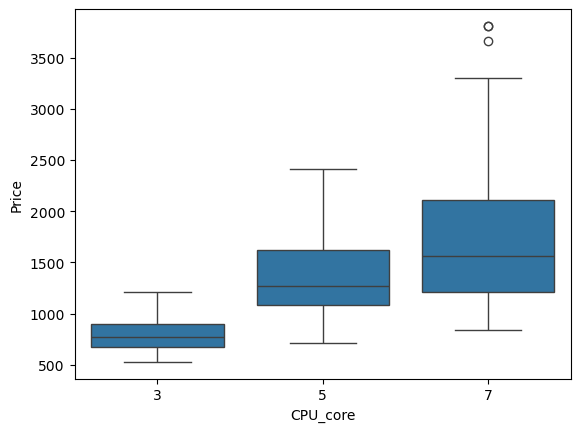

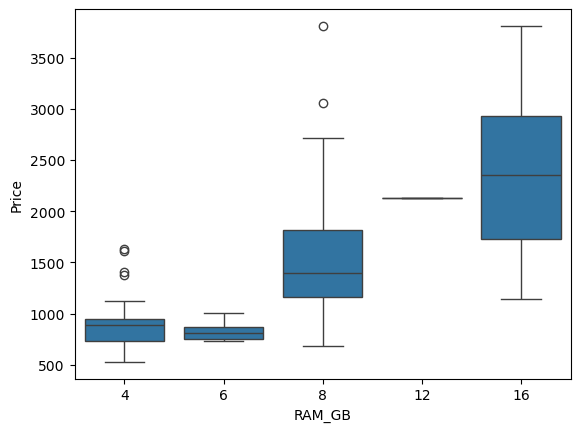

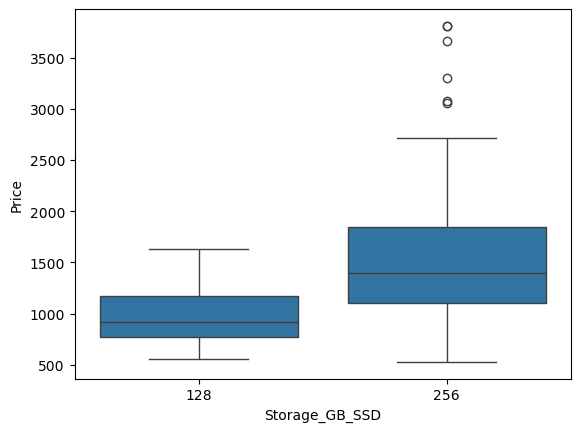

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming 'data' is the pandas DataFrame containing your dataset

# 1. Create regression plots
sns.pairplot(df, x_vars=['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds'], y_vars=['Price'], kind='reg')
plt.show()

# 2. Create box plots
attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.show()

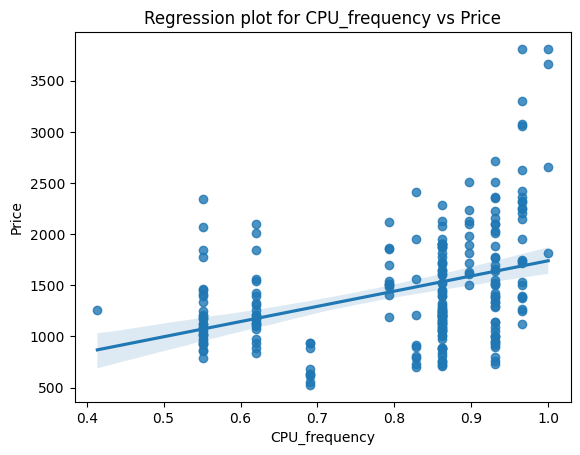

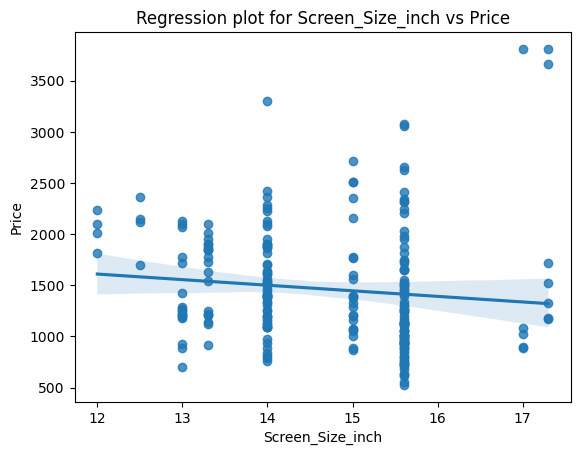

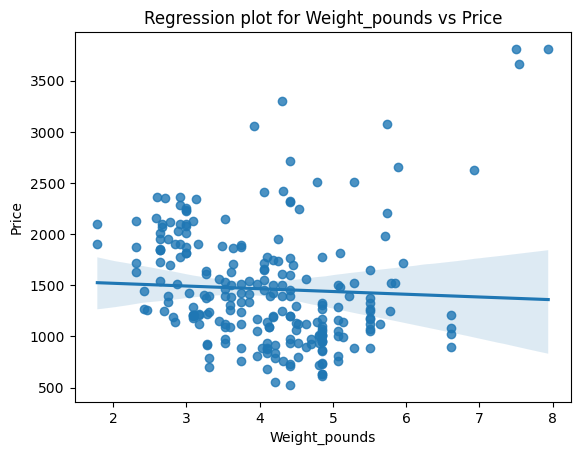

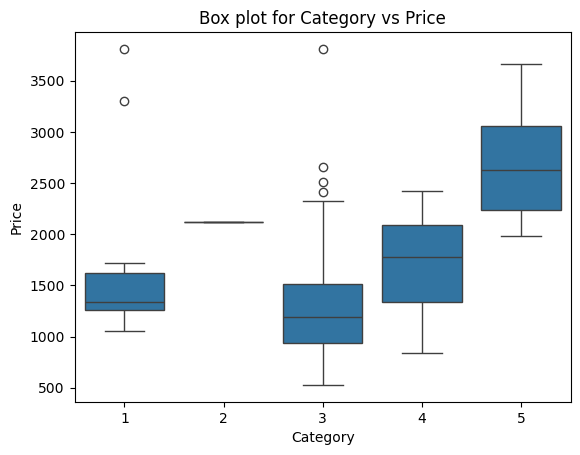

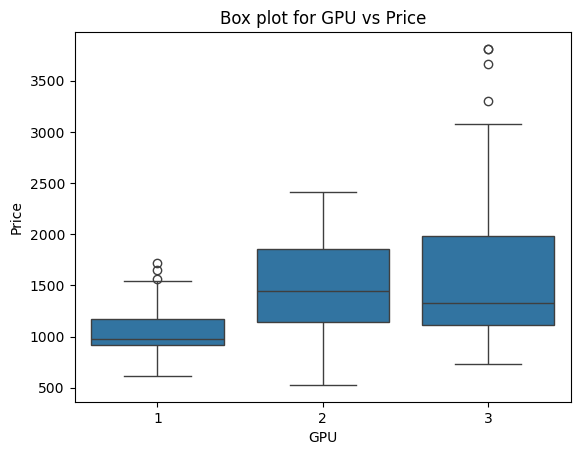

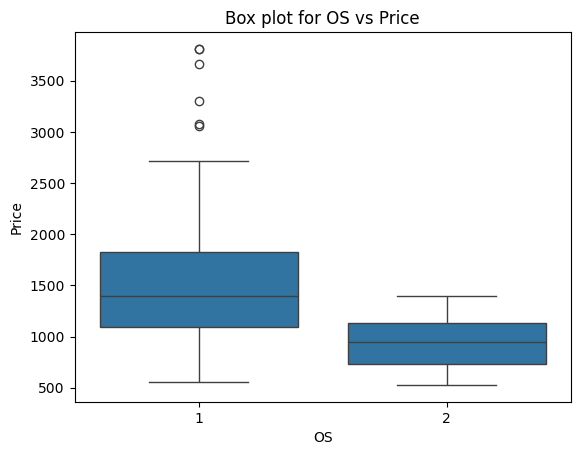

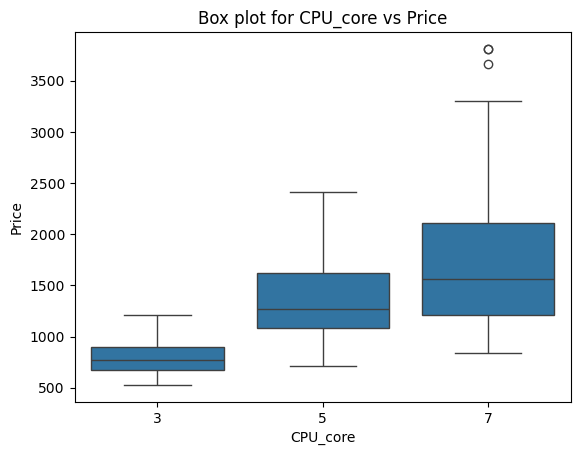

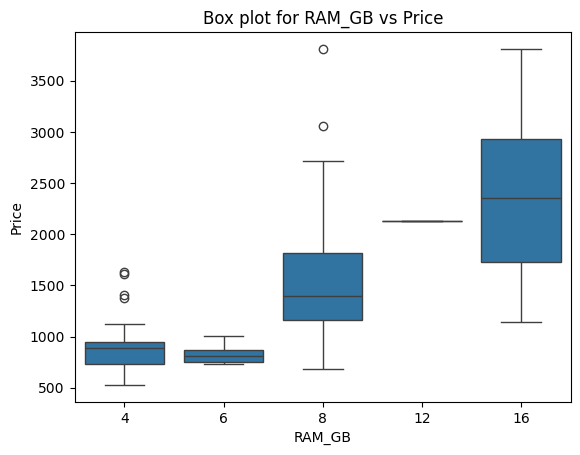

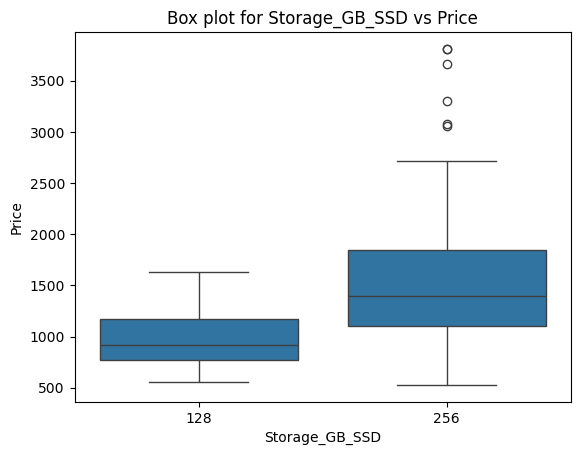

In [10]:
regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

### Write a Python code for the following.
1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
2. Don't include the values evaluated for target variable against itself.
3. Print these values as a part of a single dataframe against each individual attribute.

In [14]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# 1. Evaluate correlation values, Pearson coefficient, and p-values
correlation_data = {'Attribute': [], 'Correlation': [], 'Pearson Coefficient': [], 'P-value': []}
target_variable = 'Price'

numerical_attributes = df.select_dtypes(include=[np.number]).columns
numerical_attributes = numerical_attributes.drop(target_variable)

for attribute in numerical_attributes:
    correlation = df[attribute].corr(df[target_variable])
    pearson_coeff, p_value = pearsonr(df[attribute], df[target_variable])
    correlation_data['Attribute'].append(attribute)
    correlation_data['Correlation'].append(correlation)
    correlation_data['Pearson Coefficient'].append(pearson_coeff)
    correlation_data['P-value'].append(p_value)

correlation_df = pd.DataFrame(correlation_data)

# 2. Print the values in a single dataframe
print(correlation_df)

           Attribute  Correlation  Pearson Coefficient       P-value
0       Unnamed: 0.1     0.321933             0.321933  3.851058e-07
1         Unnamed: 0     0.321933             0.321933  3.851058e-07
2           Category     0.286243             0.286243  7.225696e-06
3                GPU     0.288298             0.288298  6.166950e-06
4                 OS    -0.221730            -0.221730  5.696643e-04
5           CPU_core     0.459398             0.459398  7.912950e-14
6   Screen_Size_inch    -0.110644            -0.110644  8.853398e-02
7      CPU_frequency     0.366666             0.366666  5.502463e-09
8             RAM_GB     0.549297             0.549297  3.681561e-20
9     Storage_GB_SSD     0.243421             0.243421  1.489892e-04
10     Weight_pounds    -0.050312            -0.050312  4.397694e-01
11    Screen-Full_HD    -0.021075            -0.021075  7.463568e-01
12  Screen-IPS_panel     0.021075             0.021075  7.463568e-01


In [15]:
correlation_df

,Attribute,Correlation,Pearson Coefficient,P-value
0,Unnamed: 0.1,0.321933,0.321933,3.851058e-07
1,Unnamed: 0,0.321933,0.321933,3.851058e-07
2,Category,0.286243,0.286243,7.225696e-06
3,GPU,0.288298,0.288298,6.166950e-06
4,OS,-0.221730,-0.221730,5.696643e-04
5,CPU_core,0.459398,0.459398,7.912950e-14
6,Screen_Size_inch,-0.110644,-0.110644,8.853398e-02
7,CPU_frequency,0.366666,0.366666,5.502463e-09
8,RAM_GB,0.549297,0.549297,3.681561e-20
9,Storage_GB_SSD,0.243421,0.243421,1.489892e-04


### Write a python code that performs the following actions.
1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
3. Plot a pcolor plot for this pivot table.

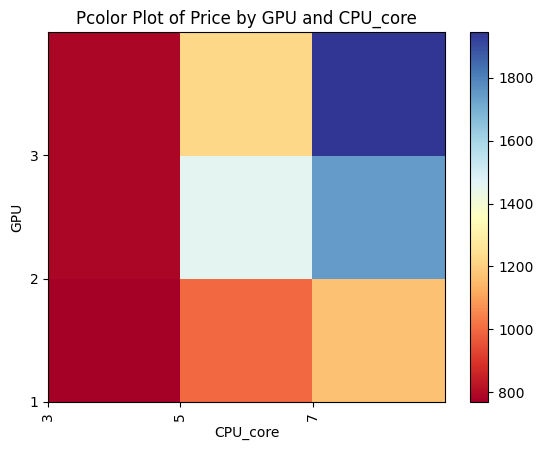

In [16]:
# Group the attributes GPU, CPU_core, and Price
grouped_df = df.groupby(['GPU', 'CPU_core'])['Price'].mean().reset_index()

# Create a pivot table
pivot_table = grouped_df.pivot(index='GPU', columns='CPU_core', values='Price')

# Plot a pcolor plot for the pivot table
plt.pcolor(pivot_table, cmap='RdYlBu')
plt.colorbar()
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns, rotation='vertical')
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)
plt.xlabel('CPU_core')
plt.ylabel('GPU'))
plt.title('Pcolor Plot of Price by GPU and CPU_core')
plt.show()